In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import seaborn as sns

Data description and wrangling


In [42]:
file = '/Users/olayinkafaniran/Documents/AIDA/COURSE WORK/DISSERTATION/DISSERTAION DATA/DATAOPTION1.csv'
df = pd.read_csv(file)
df.head()

,trans_date_trans_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,latitude,longitude,city_population,job,day_of_birth,trans_number,unix_time,merchant_lat,merchant_long,fraud
0,2/1/2021 0:02,4.750000e+12,fraud_Kling-Grant,grocery_net,19.46,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,...,41.4802,-86.6919,1423,"Psychologist, forensic",10/7/1998,0442179ed2d64942bc45c5442c3d5895,1328054544,41.587290,-87.582956,0
1,2/1/2021 0:03,4.330000e+15,fraud_Huel-Langworth,misc_net,13.01,Scott,Martin,M,7483 Navarro Flats,Freedom,...,43.0172,-111.0292,471,"Education officer, museum",8/2/1967,ef5b8cbad64ceecb8d1b81960a49b467,1328054607,42.032369,-111.700448,0
2,2/1/2021 0:05,4.720000e+18,"fraud_Streich, Hansen and Veum",gas_transport,50.02,Robert,Drake,M,463 Willie Estates,Burbank,...,36.6966,-96.7869,471,Sub,3/30/1941,eae42972de9670a3d907035c0594d494,1328054744,36.413203,-95.986495,0
3,2/1/2021 0:06,1.800000e+14,fraud_Johns Inc,entertainment,6.11,Jared,Camacho,M,4257 Perez Mall,Canton,...,40.8027,-81.3739,192805,Building control surveyor,6/30/1963,2832eb7d75a6f04468c3e52b03103090,1328054781,40.576060,-81.529672,0
4,2/1/2021 0:08,4.540000e+18,fraud_Spinka Inc,grocery_net,32.14,Nathan,Mendoza,M,767 Adam Mill Apt. 115,Espanola,...,35.9866,-106.0654,18408,Historic buildings inspector/conservation officer,7/18/1972,345575e8bebaaed20c5ded6694383a3a,1328054900,35.125220,-105.981956,0


In [43]:
df.shape

(975036, 22)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975036 entries, 0 to 975035
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  975036 non-null  object 
 1   credit_card_number     975036 non-null  float64
 2   merchant               975036 non-null  object 
 3   category               975036 non-null  object 
 4   amount                 975036 non-null  float64
 5   first_name             975036 non-null  object 
 6   last_name              975036 non-null  object 
 7   gender                 975036 non-null  object 
 8   street                 975036 non-null  object 
 9   city                   975036 non-null  object 
 10  state                  975036 non-null  object 
 11  zip_code               975036 non-null  int64  
 12  latitude               975036 non-null  float64
 13  longitude              975036 non-null  float64
 14  city_population        975036 non-nu

In [45]:
df.dtypes

trans_date_trans_time     object
credit_card_number       float64
merchant                  object
category                  object
amount                   float64
first_name                object
last_name                 object
gender                    object
street                    object
city                      object
state                     object
zip_code                   int64
latitude                 float64
longitude                float64
city_population            int64
job                       object
day_of_birth              object
trans_number              object
unix_time                  int64
merchant_lat             float64
merchant_long            float64
fraud                      int64
dtype: object

In [46]:
time_conv = pd.to_timedelta(df['unix_time'], unit = 's')
df['Day_Time'] = (time_conv.dt.components.days).astype(int)
df['Hour_Time'] = (time_conv.dt.components.hours).astype(int)
df['Min_Time'] = (time_conv.dt.components.minutes).astype(int)

In [47]:
select = ['credit_card_number','amount','zip_code','latitude','longitude',
          'city_population','unix_time','merchant_lat','Day_Time','Hour_Time','Min_Time',
         'merchant_long','fraud']
df = df.loc[:,select]
df.head()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,unix_time,merchant_lat,Day_Time,Hour_Time,Min_Time,merchant_long,fraud
0,4.750000e+12,19.46,46346,41.4802,-86.6919,1423,1328054544,41.587290,15371,0,2,-87.582956,0
1,4.330000e+15,13.01,83120,43.0172,-111.0292,471,1328054607,42.032369,15371,0,3,-111.700448,0
2,4.720000e+18,50.02,74633,36.6966,-96.7869,471,1328054744,36.413203,15371,0,5,-95.986495,0
3,1.800000e+14,6.11,44702,40.8027,-81.3739,192805,1328054781,40.576060,15371,0,6,-81.529672,0
4,4.540000e+18,32.14,87533,35.9866,-106.0654,18408,1328054900,35.125220,15371,0,8,-105.981956,0


In [48]:
df.drop(['Day_Time','Min_Time', 'unix_time'], axis = 1, inplace= True)



In [49]:
df.head()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long,fraud
0,4.750000e+12,19.46,46346,41.4802,-86.6919,1423,41.587290,0,-87.582956,0
1,4.330000e+15,13.01,83120,43.0172,-111.0292,471,42.032369,0,-111.700448,0
2,4.720000e+18,50.02,74633,36.6966,-96.7869,471,36.413203,0,-95.986495,0
3,1.800000e+14,6.11,44702,40.8027,-81.3739,192805,40.576060,0,-81.529672,0
4,4.540000e+18,32.14,87533,35.9866,-106.0654,18408,35.125220,0,-105.981956,0


In [50]:
df.head()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long,fraud
0,4.750000e+12,19.46,46346,41.4802,-86.6919,1423,41.587290,0,-87.582956,0
1,4.330000e+15,13.01,83120,43.0172,-111.0292,471,42.032369,0,-111.700448,0
2,4.720000e+18,50.02,74633,36.6966,-96.7869,471,36.413203,0,-95.986495,0
3,1.800000e+14,6.11,44702,40.8027,-81.3739,192805,40.576060,0,-81.529672,0
4,4.540000e+18,32.14,87533,35.9866,-106.0654,18408,35.125220,0,-105.981956,0


In [51]:
df.describe()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long,fraud
count,9.750360e+05,975036.000000,975036.000000,975036.000000,975036.000000,9.750360e+05,975036.000000,975036.000000,975036.000000,975036.000000
mean,4.171978e+17,70.213255,48815.857405,38.534111,-90.231395,8.904288e+04,38.534049,12.805828,-90.231559,0.005551
std,1.308903e+18,160.831716,26893.862150,5.076803,13.754579,3.025941e+05,5.111292,6.817871,13.766833,0.074295
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,19.027785,0.000000,-166.671242,0.000000
25%,1.800000e+14,9.640000,26237.000000,34.620500,-96.798000,7.430000e+02,34.730153,7.000000,-96.900836,0.000000
50%,3.520000e+15,47.420000,48174.000000,39.354300,-87.476900,2.456000e+03,39.364304,14.000000,-87.448250,0.000000
75%,4.640000e+15,83.010000,72042.000000,41.940400,-80.158000,2.032800e+04,41.958414,19.000000,-80.239186,0.000000
max,4.990000e+18,28948.900000,99783.000000,66.693300,-67.950300,2.906700e+06,67.510267,23.000000,-66.950902,1.000000


In [52]:
df.isnull().sum()

credit_card_number    0
amount                0
zip_code              0
latitude              0
longitude             0
city_population       0
merchant_lat          0
Hour_Time             0
merchant_long         0
fraud                 0
dtype: int64

In [54]:
valid = df[df['fraud']==0]
fraud = df[df['fraud']==1]

In [57]:
valid['amount'].describe()

count    969624.000000
mean         67.632401
std         154.783802
min           1.000000
25%           9.600000
50%          47.200000
75%          82.450000
max       28948.900000
Name: amount, dtype: float64

In [58]:
fraud['amount'].describe()

count    5412.000000
mean      532.603975
std       391.002744
min         1.180000
25%       247.357500
50%       409.770000
75%       902.985000
max      1371.810000
Name: amount, dtype: float64

In [53]:
df.groupby('fraud').sum()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long
fraud,,,,,,,,,
0,4.047216e+23,65577998.83,47334333419,3.736316e+07,-8.749244e+07,86320130419,3.736316e+07,12410523,-8.749263e+07
1,2.061247e+21,2882452.71,262884922,2.089807e+05,-4.864170e+05,499881190,2.089302e+05,75620,-4.863834e+05


In [15]:
valid.shape

(969624, 10)

In [16]:
fraud.shape

(5412, 10)

In [17]:
valid.isnull().value_counts().sum()

969624

In [18]:
fraud.isnull().value_counts().sum()

5412

In [19]:
valid.describe()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long,fraud
count,9.696240e+05,969624.000000,969624.000000,969624.000000,969624.00000,9.696240e+05,969624.000000,969624.000000,969624.000000,969624.0
mean,4.174006e+17,67.632401,48817.204833,38.533663,-90.23337,8.902433e+04,38.533653,12.799315,-90.233570,0.0
std,1.309220e+18,154.783802,26892.580566,5.076603,13.75406,3.026609e+05,5.111020,6.797538,13.766265,0.0
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.67230,2.300000e+01,19.027785,0.000000,-166.671242,0.0
25%,1.800000e+14,9.600000,26237.000000,34.620500,-96.79800,7.430000e+02,34.728149,7.000000,-96.902851,0.0
50%,3.520000e+15,47.200000,48174.000000,39.354300,-87.47690,2.456000e+03,39.363442,14.000000,-87.449393,0.0
75%,4.640000e+15,82.450000,72042.000000,41.940400,-80.15800,2.032800e+04,41.958045,19.000000,-80.240080,0.0
max,4.990000e+18,28948.900000,99783.000000,65.689900,-67.95030,2.906700e+06,66.673550,23.000000,-66.950902,0.0


In [20]:
fraud.describe()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long,fraud
count,5.412000e+03,5412.000000,5412.000000,5412.000000,5412.000000,5.412000e+03,5412.000000,5412.000000,5412.000000,5412.0
mean,3.808661e+17,532.603975,48574.449741,38.614321,-89.877500,9.236533e+04,38.604986,13.972653,-89.871279,1.0
std,1.250446e+18,391.002744,27123.921069,5.112385,13.844039,2.903942e+05,5.159834,9.733028,13.864808,0.0
min,6.041621e+10,1.180000,1330.000000,20.027100,-155.369700,3.700000e+01,19.425114,0.000000,-155.983643,1.0
25%,1.447250e+14,247.357500,24986.000000,35.027100,-96.596900,7.440000e+02,35.060056,2.000000,-96.418797,1.0
50%,3.520000e+15,409.770000,48043.000000,39.548300,-86.992000,2.644000e+03,39.515094,22.000000,-87.192223,1.0
75%,4.662500e+15,902.985000,72042.000000,42.074000,-80.064850,2.545900e+04,42.043314,23.000000,-80.073944,1.0
max,4.990000e+18,1371.810000,99747.000000,66.693300,-68.556500,2.906700e+06,67.510267,23.000000,-67.569238,1.0


In [21]:
valid_sample = valid.sample(n=5412)
valid_sample.head()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long,fraud
464640,4.270000e+15,3.62,72047,35.2087,-92.2123,969,35.419469,17,-91.795471,0
667292,3.030000e+13,9.20,72165,35.5762,-91.4539,111,35.034727,15,-90.894857,0
927397,5.740000e+11,8.15,60091,42.0765,-87.7246,27020,42.071360,9,-87.508127,0
903314,5.130000e+15,87.45,45808,40.8314,-83.9758,349,40.454367,8,-83.953592,0
497987,4.100000e+12,68.02,79343,33.6666,-101.5277,1571,34.115406,22,-102.388362,0


In [22]:
df_new = pd.concat([valid_sample, fraud], axis = 0)
df_new.head()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long,fraud
464640,4.270000e+15,3.62,72047,35.2087,-92.2123,969,35.419469,17,-91.795471,0
667292,3.030000e+13,9.20,72165,35.5762,-91.4539,111,35.034727,15,-90.894857,0
927397,5.740000e+11,8.15,60091,42.0765,-87.7246,27020,42.071360,9,-87.508127,0
903314,5.130000e+15,87.45,45808,40.8314,-83.9758,349,40.454367,8,-83.953592,0
497987,4.100000e+12,68.02,79343,33.6666,-101.5277,1571,34.115406,22,-102.388362,0


In [23]:
df_new.shape

(10824, 10)

In [24]:
df_new['fraud'].value_counts()

0    5412
1    5412
Name: fraud, dtype: int64

In [25]:
df_new.groupby('fraud').mean()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long
fraud,,,,,,,,,
0,4.420510e+17,68.600255,48897.998891,38.520773,-90.39774,84261.405580,38.522516,12.712491,-90.401953
1,3.808661e+17,532.603975,48574.449741,38.614321,-89.87750,92365.334442,38.604986,13.972653,-89.871279


In [26]:
correlation = df.corr()
correlation

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long,fraud
credit_card_number,1.000000,0.001071,0.040917,-0.059138,-0.047546,-0.009005,-0.058792,0.000040,-0.047497,-0.002074
amount,0.001071,1.000000,0.001763,-0.002338,0.000202,0.005658,-0.002266,-0.022675,0.000186,0.214790
zip_code,0.040917,0.001763,1.000000,-0.113947,-0.910007,0.079070,-0.113246,0.005825,-0.909194,-0.000671
latitude,-0.059138,-0.002338,-0.113947,1.000000,-0.015869,-0.155919,0.993599,-0.011597,-0.015861,0.001180
longitude,-0.047546,0.000202,-0.910007,-0.015869,1.000000,-0.053283,-0.015787,-0.002298,0.999120,0.001922
city_population,-0.009005,0.005658,0.079070,-0.155919,-0.053283,1.000000,-0.155064,0.020291,-0.053253,0.000820
merchant_lat,-0.058792,-0.002266,-0.113246,0.993599,-0.015787,-0.155064,1.000000,-0.011431,-0.015781,0.001037
Hour_Time,0.000040,-0.022675,0.005825,-0.011597,-0.002298,0.020291,-0.011431,1.000000,-0.002300,0.012786
merchant_long,-0.047497,0.000186,-0.909194,-0.015861,0.999120,-0.053253,-0.015781,-0.002300,1.000000,0.001955
fraud,-0.002074,0.214790,-0.000671,0.001180,0.001922,0.000820,0.001037,0.012786,0.001955,1.000000


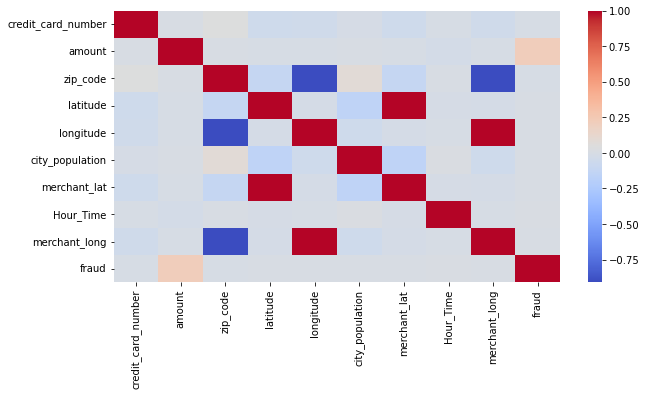

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation, linecolor= 'red', cmap='coolwarm')
plt.show()

In [28]:
X = df_new.drop('fraud', axis = 1)
Y = df_new['fraud']

In [29]:
X.head()

,credit_card_number,amount,zip_code,latitude,longitude,city_population,merchant_lat,Hour_Time,merchant_long
464640,4.270000e+15,3.62,72047,35.2087,-92.2123,969,35.419469,17,-91.795471
667292,3.030000e+13,9.20,72165,35.5762,-91.4539,111,35.034727,15,-90.894857
927397,5.740000e+11,8.15,60091,42.0765,-87.7246,27020,42.071360,9,-87.508127
903314,5.130000e+15,87.45,45808,40.8314,-83.9758,349,40.454367,8,-83.953592
497987,4.100000e+12,68.02,79343,33.6666,-101.5277,1571,34.115406,22,-102.388362


In [30]:
print(Y)

464640    0
667292    0
927397    0
903314    0
497987    0
         ..
974871    1
974926    1
974951    1
974986    1
975005    1
Name: fraud, Length: 10824, dtype: int64


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [32]:
print(X.shape, x_train.shape, x_test.shape)

(10824, 9) (8659, 9) (2165, 9)


In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
from copy import deepcopy
model2 = deepcopy(model)

In [35]:
model2 = sm.OLS(X,Y).fit()
# result = model2.fit()
# print(result.summary())

In [36]:
y_predict = model.predict(x_train)
model_accuracy_score = accuracy_score(y_predict, y_train)
print('The model accuracy score on training data is', ',', model_accuracy_score)

The model accuracy score on training data is , 0.49994225661161795


In [37]:
y_predict_test = model.predict(x_test)
model_accuracy_score = accuracy_score(y_predict_test, y_test)
print('The model accuracy score on test data is', ',', model_accuracy_score)

The model accuracy score on test data is , 0.5002309468822171


/Users/olayinkafaniran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/olayinkafaniran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/olayinkafaniran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

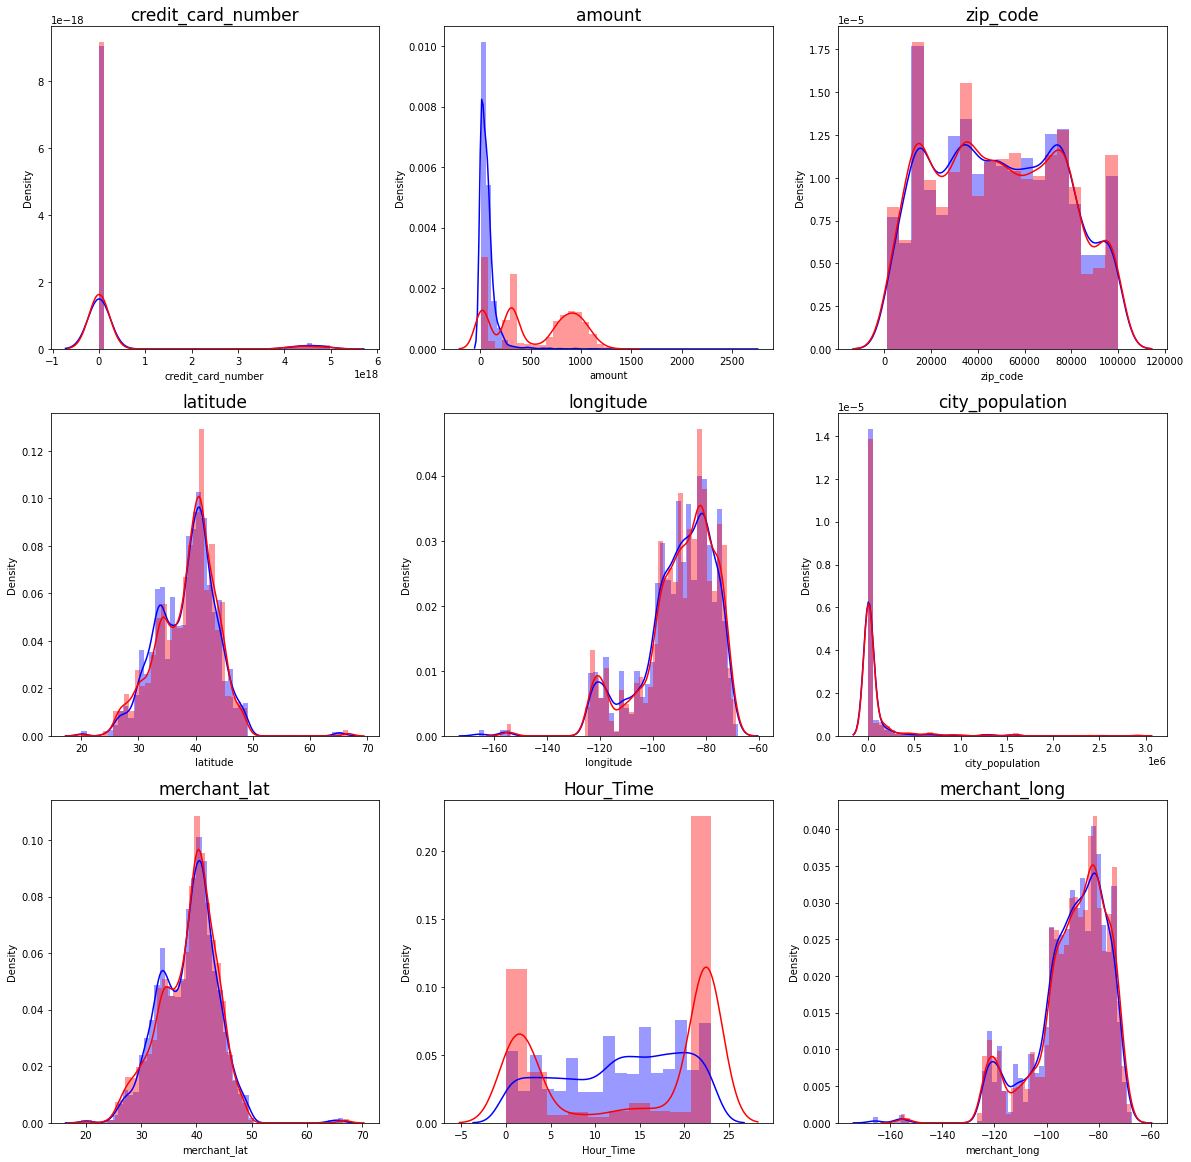

In [38]:
cols = list(X.columns.values)

valid_trx = df.fraud == 0
fraud_trx = df.fraud == 1

plt.figure(figsize=(20, 70))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][valid_trx], color='blue')
  sns.distplot(X[col][fraud_trx], color='red')
  plt.title(col, fontsize=17)
plt.show()

# MACHINE LEARNING MODELS

In [59]:
df_model_results = pd.DataFrame(columns = ['Methodology','Model','Accuracy','Roc_value','Threshold'])

CONFUSSION MATRIX